In [1]:
#Importing all the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the .csv file using pandas
df = pd.read_csv('jena_climate_2009_2016.csv')

#Filtering the minute datas from the dataframe
df = df[5::6]

#Changes the index column and drops the datetime column
df.index = pd.to_datetime(df['Date Time'], format = "%d.%m.%Y %H:%M:%S")
df = df.drop(['Date Time'], axis = 1)

In [2]:
temp = df[['T (degC)']]

In [3]:
temp.head()

,T (degC)
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63


In [4]:
temp_np  = temp.to_numpy()
temp_np[[2]].shape

(1, 1)

In [5]:
def df_to_array(df, win_size = 5):
    df_as_np = df.to_numpy()
    X = []
    Y = []

    for i in range(len(temp) - win_size):
        X.append(df_as_np[i:i+win_size])
        Y.append(df_as_np[i+win_size])
    return np.array(X), np.array(Y)

In [6]:
xdata, ydata = df_to_array(temp)

In [7]:
xdata.shape

(70086, 5, 1)

In [8]:
ydata.shape

(70086, 1)

In [9]:
xdata[0]

array([[-8.05],
       [-8.88],
       [-8.81],
       [-9.05],
       [-9.63]])

In [10]:
ydata[0]

array([-9.67])

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.Sequential()

In [13]:
model.add(tf.keras.layers.InputLayer(input_shape = (5,1)))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(64, 'relu'))
model.add(tf.keras.layers.Dense(8, 'relu'))
model.add(tf.keras.layers.Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 75345 (294.32 KB)
Trainable params: 75345 (294.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [15]:
len(xdata)

70086

In [16]:
xtrain = xdata[:65000]
xtest = xdata[65000:]
ytrain = ydata[:65000]
ytest = ydata[65000:]

In [17]:
xtrain.shape

(65000, 5, 1)

In [18]:
model.fit(xtrain, ytrain, epochs = 30, validation_data = (xtest, ytest))

Epoch 1/30
2032/2032 [==============================] - 36s 14ms/step - loss: 1.8251 - root_mean_squared_error: 1.3510 - val_loss: 0.6430 - val_root_mean_squared_error: 0.8019
Epoch 2/30
2032/2032 [==============================] - 26s 13ms/step - loss: 0.6789 - root_mean_squared_error: 0.8239 - val_loss: 0.6208 - val_root_mean_squared_error: 0.7879
Epoch 3/30
2032/2032 [==============================] - 29s 14ms/step - loss: 0.6701 - root_mean_squared_error: 0.8186 - val_loss: 0.6988 - val_root_mean_squared_error: 0.8359
Epoch 4/30
2032/2032 [==============================] - 33s 16ms/step - loss: 0.6660 - root_mean_squared_error: 0.8161 - val_loss: 0.7273 - val_root_mean_squared_error: 0.8528
Epoch 5/30
2032/2032 [==============================] - 31s 15ms/step - loss: 0.6619 - root_mean_squared_error: 0.8136 - val_loss: 0.6196 - val_root_mean_squared_error: 0.7872
Epoch 6/30
2032/2032 [==============================] - 40s 20ms/step - loss: 0.6592 - root_mean_squared_error: 0.8119 -

In [19]:
yhat_test = model.predict(xtest)

159/159 [==============================] - 2s 6ms/step


In [29]:
small_yhat_test = yhat_test[:100]
small_ytest = ytest[:100]

In [30]:
len(small_yhat_test)

100

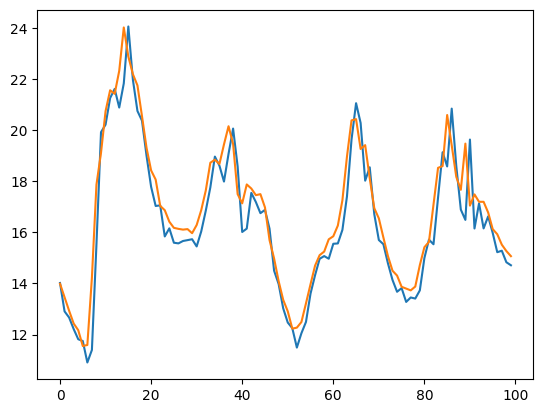

In [31]:
plt.plot(small_yhat_test)
plt.plot(small_ytest)